In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('/content/Ecommerce_Customers.csv')
orders = pd.read_csv('/content/Ecommerce_Orders.csv')
products = pd.read_csv('/content/Ecommerce_Products.csv')

In [ ]:
#check dataframes
print(customers.head(5))

   Customer_ID        Name                  Email Region Registration_Date
0            1  Customer 1  customer1@example.com  South         9/13/2023
1            2  Customer 2  customer2@example.com   East         1/20/2023
2            3  Customer 3  customer3@example.com   East          7/9/2023
3            4  Customer 4  customer4@example.com  South          9/6/2023
4            5  Customer 5  customer5@example.com   East         1/11/2023


In [ ]:
#check dataframes
print(orders.head(5))

   Order_ID  Customer_ID  Order_Date    Payment_Method Shipping_Method  \
0         1           96  2023-04-29       Credit Card         Express   
1         2           14  2023-08-16            PayPal       Overnight   
2         3           54  2023-06-25     Bank Transfer        Standard   
3         4           34  2023-07-11  Cash on Delivery         Express   
4         5           77  2023-01-22       Credit Card        Standard   

   Total_Amount  Quantity  Product_ID  
0        267.43         1          30  
1        310.72         5          22  
2        112.35         3           3  
3        217.89         5          43  
4        395.63         3          30  


In [ ]:
#check dataframes
print(products.head(5))

   Product_ID Product_Name        Category Subcategory   Price
0           1    Product 1          Beauty      Laptop  108.05
1           2    Product 2  Home & Kitchen   Appliance   21.55
2           3    Product 3     Electronics       Shoes   76.70
3           4    Product 4        Clothing      Mobile  187.51
4           5    Product 5  Home & Kitchen      Laptop  141.28


In [ ]:
#check duplicates
#check missing values
print(customers.duplicated().sum())

print(orders.duplicated().sum())

print(products.duplicated().sum())

0
0
0


In [ ]:
#drop duplicate
customers.drop_duplicates(inplace = True)
orders.drop_duplicates(inplace = True)
products.drop_duplicates(inplace = True)

In [ ]:
#check missing values
print(customers.isnull().sum())

print(orders.isnull().sum())

print(products.isnull().sum())

Customer_ID          0
Name                 0
Email                0
Region               0
Registration_Date    0
dtype: int64
Order_ID           0
Customer_ID        0
Order_Date         0
Payment_Method     0
Shipping_Method    0
Total_Amount       0
Quantity           0
Product_ID         0
dtype: int64
Product_ID      0
Product_Name    0
Category        0
Subcategory     0
Price           0
dtype: int64


In [ ]:
#check data types
print(customers.dtypes)
print(orders.dtypes)
print(products.dtypes)

Customer_ID           int64
Name                 object
Email                object
Region               object
Registration_Date    object
dtype: object
Order_ID             int64
Customer_ID          int64
Order_Date          object
Payment_Method      object
Shipping_Method     object
Total_Amount       float64
Quantity             int64
Product_ID           int64
dtype: object
Product_ID        int64
Product_Name     object
Category         object
Subcategory      object
Price           float64
dtype: object


In [ ]:
#convert into appropriate data types
orders['Order_Date']=pd.to_datetime(orders['Order_Date'])
print("Orders Data Types:")
print(orders.dtypes)

Orders Data Types:
Order_ID                    int64
Customer_ID                 int64
Order_Date         datetime64[ns]
Payment_Method             object
Shipping_Method            object
Total_Amount              float64
Quantity                    int64
Product_ID                  int64
dtype: object


In [ ]:
#convert into appropriate data types
customers['Registration_Date']=pd.to_datetime(customers['Registration_Date'])
print("Customers Data Types:")
print(customers.dtypes)

Customers Data Types:
Customer_ID                   int64
Name                         object
Email                        object
Region                       object
Registration_Date    datetime64[ns]
dtype: object


In [ ]:
#add month column
orders['Month']=orders['Order_Date'].dt.strftime('%b')

In [ ]:
#merge data
orders_products = pd.merge(orders,products, on = 'Product_ID', how = 'left' )

#full data by merging 3 tables
full_merge = pd.merge(orders_products, customers, on ='Customer_ID', how ='left')
print("full data")
print(full_merge)

full data
     Order_ID  Customer_ID Order_Date    Payment_Method Shipping_Method  \
0           1           96 2023-04-29       Credit Card         Express   
1           2           14 2023-08-16            PayPal       Overnight   
2           3           54 2023-06-25     Bank Transfer        Standard   
3           4           34 2023-07-11  Cash on Delivery         Express   
4           5           77 2023-01-22       Credit Card        Standard   
..        ...          ...        ...               ...             ...   
295       296           83 2023-08-21  Cash on Delivery       Overnight   
296       297           58 2023-05-15       Credit Card        Standard   
297       298           52 2023-06-15       Credit Card        Standard   
298       299           14 2023-02-16       Credit Card        Standard   
299       300           32 2023-11-14  Cash on Delivery       Overnight   

     Total_Amount  Quantity  Product_ID Month Product_Name        Category  \
0          

In [ ]:
#add total sales column to full_merge data
full_merge['Total_Sales']= full_merge['Quantity']*full_merge['Price']

In [ ]:
#summary statistics
full_merge.describe()

,Order_ID,Customer_ID,Order_Date,Total_Amount,Quantity,Product_ID,Price,Registration_Date,Total_Sales
count,300.000000,300.000000,300,300.000000,300.000000,300.000000,300.000000,300,300.000000
mean,150.500000,52.140000,2023-07-09 11:36:00,266.685233,3.106667,26.216667,105.151733,2023-07-01 16:24:00,327.003267
min,1.000000,1.000000,2023-01-02 00:00:00,11.600000,1.000000,1.000000,10.640000,2023-01-03 00:00:00,10.640000
25%,75.750000,27.000000,2023-04-19 12:00:00,151.220000,2.000000,14.000000,45.430000,2023-03-24 00:00:00,111.825000
50%,150.500000,54.500000,2023-07-19 12:00:00,266.715000,3.000000,27.000000,111.210000,2023-07-19 00:00:00,286.590000
75%,225.250000,76.250000,2023-10-05 00:00:00,389.847500,4.000000,38.000000,154.050000,2023-09-30 00:00:00,462.945000
max,300.000000,100.000000,2023-12-31 00:00:00,499.680000,5.000000,50.000000,198.790000,2023-12-30 00:00:00,993.950000
std,86.746758,28.867366,NaN,142.108421,1.393471,14.283198,59.285864,NaN,248.860514


In [ ]:
#Group by Spending Category
bins =[0,250,500,800,1000]
labels =['low','med','high','very-high']
full_merge['Spending_category']=pd.cut(full_merge['Total_Sales'],bins = bins, labels = labels)
print(full_merge['Spending_category'].value_counts())

Spending_category
low          137
med           90
high          60
very-high     13
Name: count, dtype: int64


In [ ]:
# Top-selling 5 sub categories
top_subcategory = full_merge.groupby('Subcategory')['Total_Sales'].sum().sort_values(ascending = False)
print(top_subcategory.head(10))

Subcategory
Mobile       25143.84
Shoes        23371.54
Laptop       23021.09
Makeup       11240.06
Appliance     9224.68
Shirt         6099.77
Name: Total_Sales, dtype: float64


In [ ]:
!pip install ipython-sql prettytable
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
#connecting SQL
import sqlite3
con = sqlite3.connect('ecommerce.db')
full_merge.to_sql('ecommerce',con, if_exists='replace',index = False)

300

In [ ]:
%sql sqlite:///ecommerce.db

In [ ]:
#Top subcategory sales
%sql select Subcategory, sum(round(Total_Sales)) as Total_Sales from ecommerce group by Subcategory order by Total_Sales desc;

 * sqlite:///ecommerce.db
Done.


Subcategory,Total_Sales
Mobile,25146.0
Shoes,23374.0
Laptop,23017.0
Makeup,11237.0
Appliance,9227.0
Shirt,6100.0


 * sqlite:///ecommerce.db
Done.


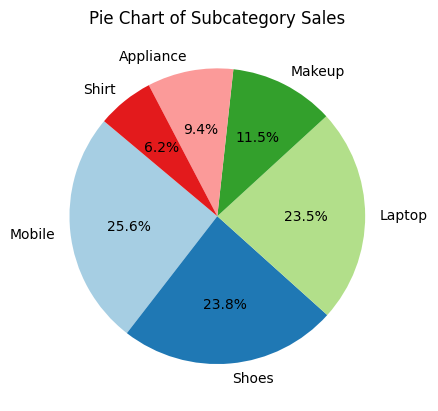

In [ ]:
#Top subcategory sales in pie chart
import matplotlib.pyplot as plt
result1 = %sql select Subcategory, sum(round(Total_Sales)) as Total_Sales from ecommerce group by Subcategory order by Total_Sales desc;
df_subcategory = pd.DataFrame(result1, columns = ["Subcategory","Sum"])
plt.pie(df_subcategory['Sum'],labels = df_subcategory['Subcategory'],autopct = '%1.1f%%',startangle = 140, colors = plt.cm.Paired.colors)
plt.title('Pie Chart of Subcategory Sales')
plt.show()

In [ ]:
#payment method
%sql select Payment_Method, count(*) as no_of_times_pay from ecommerce group by Payment_Method order by no_of_times_pay desc;

 * sqlite:///ecommerce.db
Done.


Payment_Method,no_of_times_pay
PayPal,87
Credit Card,78
Cash on Delivery,72
Bank Transfer,63


 * sqlite:///ecommerce.db
Done.


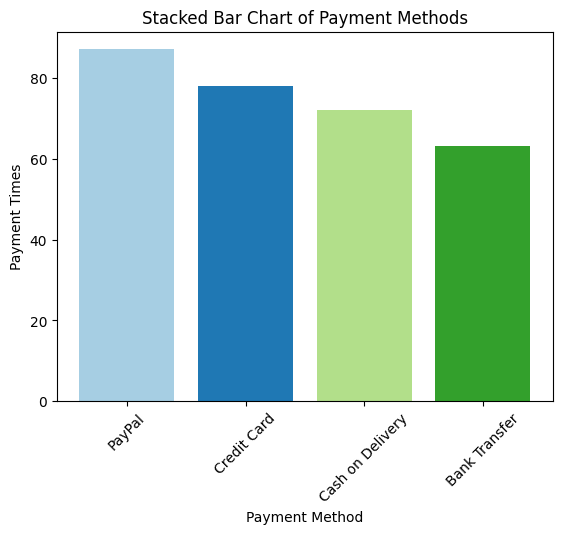

In [ ]:
#payment method in bar chart
import matplotlib.pyplot as plt
result2 =%sql select Payment_Method, count(*) as no_of_times_pay from ecommerce group by Payment_Method order by no_of_times_pay desc;
df_payment = pd.DataFrame(result2, columns = ["Payment","Count"])
plt.bar(df_payment['Payment'], df_payment['Count'], color=plt.cm.Paired.colors)
plt.xlabel('Payment Method')
plt.ylabel('Payment Times')
plt.title('Stacked Bar Chart of Payment Methods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
%sql SELECT CASE strftime('%m', Order_Date) WHEN '01' THEN 'Jan' WHEN '02' THEN 'Feb'WHEN '03' THEN 'Mar' WHEN '04' THEN 'Apr' WHEN '05' THEN 'May' WHEN '06' THEN 'Jun' WHEN '07' THEN 'Jul' WHEN '08' THEN 'Aug' WHEN '09' THEN 'Sep' WHEN '10' THEN 'Oct' WHEN '11' THEN 'Nov' WHEN '12' THEN 'Dec' END AS Month, SUM(Total_Sales) AS total_sales FROM ecommerce GROUP BY strftime('%m', Order_Date) ORDER BY strftime('%m', Order_Date);

 * sqlite:///ecommerce.db
Done.


Month,total_sales
Jan,8132.97
Feb,5215.88
Mar,6398.919999999999
Apr,8561.41
May,7877.379999999999
Jun,9451.01
Jul,8245.82
Aug,12549.49
Sep,10917.58
Oct,9814.53


 * sqlite:///ecommerce.db
Done.


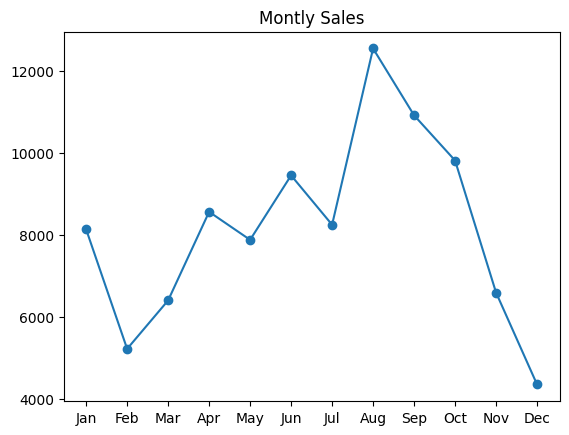

In [ ]:
#montly sales in line chart
result3 = %sql SELECT CASE strftime('%m', Order_Date) WHEN '01' THEN 'Jan' WHEN '02' THEN 'Feb'WHEN '03' THEN 'Mar' WHEN '04' THEN 'Apr' WHEN '05' THEN 'May' WHEN '06' THEN 'Jun' WHEN '07' THEN 'Jul' WHEN '08' THEN 'Aug' WHEN '09' THEN 'Sep' WHEN '10' THEN 'Oct' WHEN '11' THEN 'Nov' WHEN '12' THEN 'Dec' END AS Month, SUM(Total_Sales) AS total_sales FROM ecommerce GROUP BY strftime('%m', Order_Date) ORDER BY strftime('%m', Order_Date);
df_monthly_sales = pd.DataFrame(result3, columns =["Month","Sales"])
plt.plot(df_monthly_sales['Month'], df_monthly_sales['Sales'], data = df_monthly_sales, marker ='o')
plt.title("Montly Sales")
plt.show()

In [ ]:
#shipping method
%sql select Shipping_Method, Sum(Quantity) as quantity from ecommerce group by Shipping_Method order by quantity desc;

 * sqlite:///ecommerce.db
Done.


Shipping_Method,quantity
Overnight,334
Express,329
Standard,269


 * sqlite:///ecommerce.db
Done.


<function matplotlib.pyplot.show(close=None, block=None)>

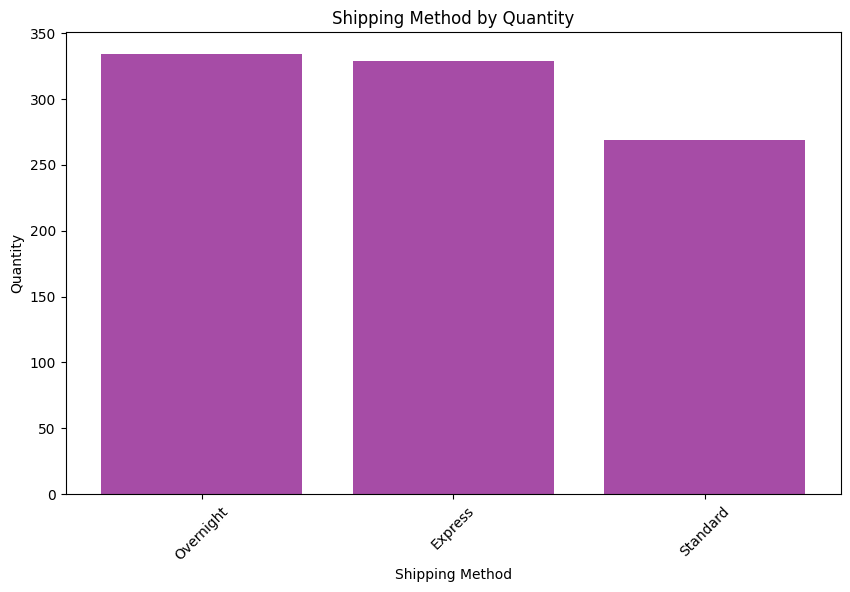

In [ ]:
#shipping method in bar
result4 = %sql select Shipping_Method, Sum(Quantity) as quantity from ecommerce group by Shipping_Method order by quantity desc;
df_shipping = pd.DataFrame(result4, columns = ["Shipping Method","Quantity"])
plt.figure(figsize=(10, 6))
plt.bar(df_shipping['Shipping Method'], df_shipping['Quantity'], color='purple', alpha=0.7)
plt.title('Shipping Method by Quantity')
plt.xlabel('Shipping Method')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show

In [ ]:
#sales by region
%sql select Region, Sum(Round(Total_Sales)) from ecommerce group by Region order by Total_Sales desc;

 * sqlite:///ecommerce.db
Done.


Region,Sum(Round(Total_Sales))
East,25790.0
South,20822.0
West,28471.0
North,23018.0


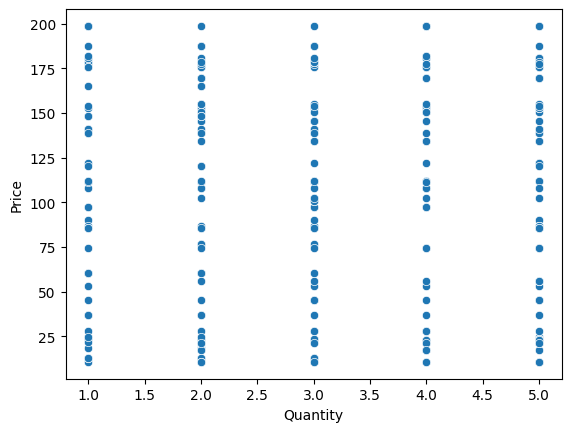

In [ ]:
#correlation between sales and category
import seaborn as sns
sns.scatterplot(y = full_merge['Price'],x= full_merge['Quantity'],data = full_merge)
plt.show()

<ipython-input-68-2d967dcdb252>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




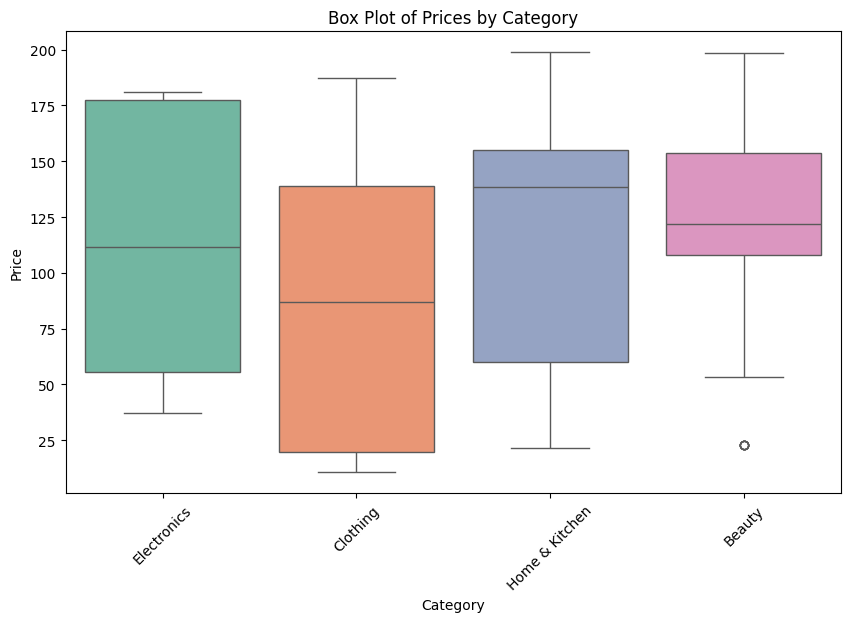

In [ ]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x= full_merge['Category'], y=full_merge['Price'], data=full_merge, palette="Set2")
plt.title("Box Plot of Prices by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install dash pandas plotly

In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Dash Application
app = dash.Dash(__name__)

# Dropdown options for filters
regions = full_merge['Region'].dropna().unique()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Ecommerce Dashboard", style={'text-align': 'center'}),
    html.Div([
        html.Div([
            html.Label("Select Region:"),
            dcc.Dropdown(
                id='region-dropdown',
                options=[{'label': region, 'value': region} for region in regions],
                value=regions[0] if len(regions) > 0 else None
            )
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div([
            html.Label("Select Month:"),
            dcc.Dropdown(
                id='month-dropdown',
                options=[{'label': month, 'value': month} for month in months],
                value='Jan'
            )
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    html.Div([
        dcc.Graph(id='pie-chart'),
        dcc.Graph(id='bar-chart'),
        dcc.Graph(id='line-chart'),
        dcc.Graph(id='box-plot'),
    ])
])

# Callback to update charts
@app.callback(
    [Output('pie-chart', 'figure'),
     Output('bar-chart', 'figure'),
     Output('line-chart', 'figure'),
     Output('box-plot', 'figure')],
    [Input('region-dropdown', 'value'),
     Input('month-dropdown', 'value')]
)
def update_charts(selected_region, selected_month):
    filtered_data = full_merge[
        (full_merge['Region'] == selected_region) &
        (full_merge['Month'] == selected_month)
    ]

    pie_fig = px.pie(filtered_data, names='Subcategory', values='Total_Sales', title='Top Subcategory Sales')
    bar_fig = px.bar(filtered_data, x='Payment_Method', y='Total_Sales', title='Payment Methods')
    line_fig = px.line(filtered_data.groupby('Month')['Total_Sales'].sum().reset_index(), x='Month', y='Total_Sales', title='Monthly Sales')
    box_fig = px.box(filtered_data, x='Category', y='Price', title='Prices by Category', color='Category')

    return pie_fig, bar_fig, line_fig, box_fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

<IPython.core.display.Javascript object>